## The dVs/Vs effective vertical stress model

The purpose of this Jupyter Notebook is to illustrate how the dVs/Vs model and manuscript figures were obtained. 
Reference to manuscript to be included following submittal.


In [1]:
#Import necessary packages
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle
import warnings
#warnings.filterwarnings('ignore') #hide warnings (related to mean of empty slice, due to array masking)

In [3]:
#input parameters

ista=0                                               # set index at 0
nsta=25                                              # number of stations
mdays=60                                             # max 60 days shown for plotting 
date = np.array('2020-06-18', dtype=np.datetime64)   # start date June 18 2021
datevec=date+np.arange(mdays)
starttime=17                                         # sets position in csv to starttime of June 18 2020
endtime=starttime+mdays

In [4]:
#import environmental site data.

#rainfall from environment canada weather station
climate_data=pd.read_csv("envcanada_rainfall.csv")
climate_data["date"]=pd.to_datetime(climate_data["date"])
rf_data=climate_data.iloc[starttime:endtime, 1].values  

#tailings pond station data
pp_station=pd.read_csv('pp_station.csv')       # baro, surface temp (in datalogger enclosure), pond sensor temp, pond sensor level from 2020-06 to 2020-09
pp_data=pp_station.iloc[:,4].values            # pond level data (in m)
baro=pp_station.iloc[:,1].values               # barometric pressure data (in m)
temp=pp_station.iloc[:,2].values               # temperature data (panel temp, in deg C)
surface_temp=pp_station.iloc[:,2].values
pp_station["Time"]=pd.to_datetime(pp_station["Time"])

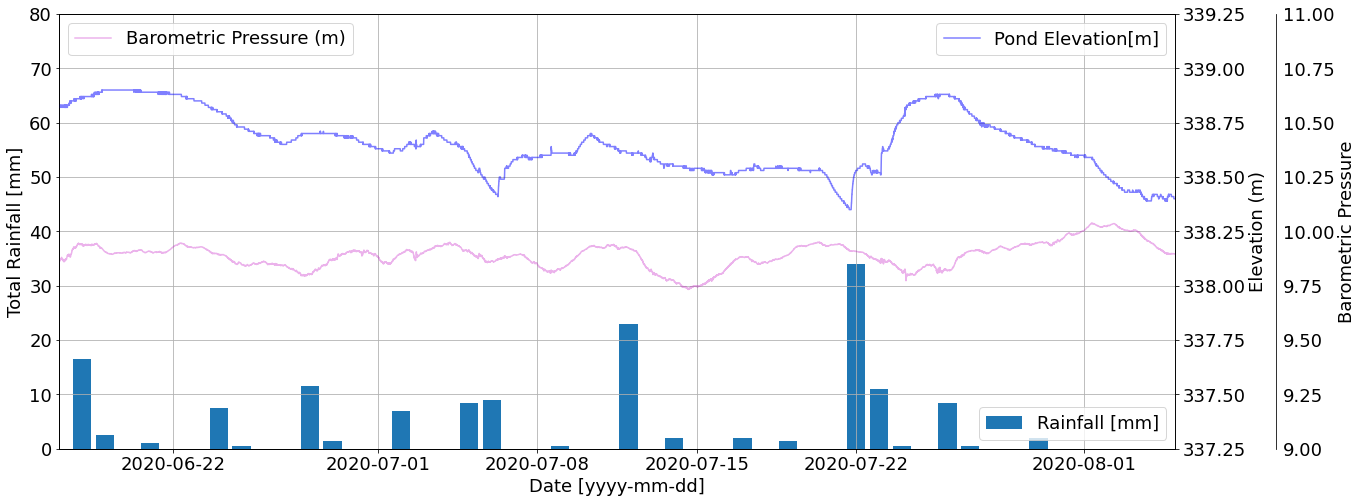

In [5]:
#plot environmental site data

plt.rcParams["figure.figsize"]=(20,8)
fig,(ax1)=plt.subplots(nrows=1, ncols=1,sharex=True)

# #pandas rainfall data
ax1.bar(datevec,rf_data, label="Rainfall [mm]")
ax1.set_ylim(0,80)
ax1.set_ylabel("Total Rainfall [mm]",fontsize=18)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=18)
ax1.grid()
ax1.set_xlim('2020-06-17','2020-08-05')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.legend(fontsize=18,loc=4)

# # Barometric pressure
ax2=ax1.twinx()
ax2.plot(pp_station["Time"],baro,'-m',alpha=0.3,label="Barometric Pressure (m)")
ax2.spines['right'].set_position(("axes", 1.09))
ax2.set_ylim(9,11)
ax2.tick_params(axis='y',labelsize=18)
ax2.yaxis.set_ticks_position('none')
ax2.set_ylabel("Barometric Pressure",fontsize=18)
ax2.legend(fontsize=18,loc=2)

ax3=ax1.twinx()
ax3.set_ylabel("Elevation (m)",fontsize=18)
ax3.set_ylim(337.25,339.25)
ax3.plot(pp_station["Time"],pp_station['Primary Pond Level[m]'],'-b',alpha=0.5,label='Pond Elevation[m]')
ax3.legend(fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xlim('2020-06-17','2020-08-05')
ax3.tick_params(axis='x', labelsize=18) 
#plt.title("Environmental Site Data",fontsize=24)
plt.show()

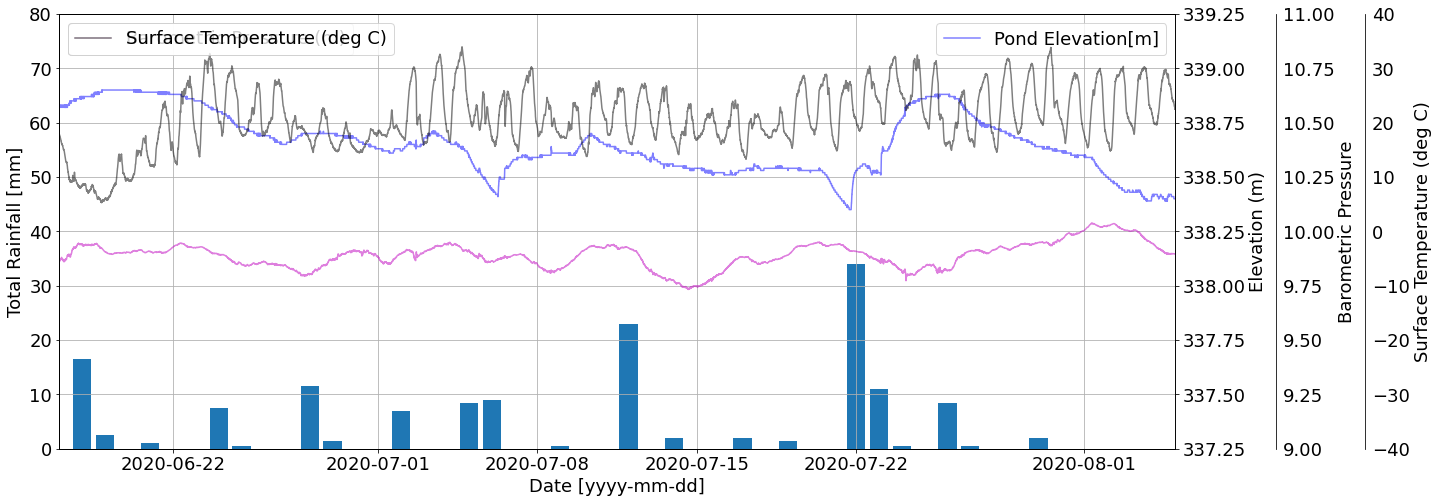

In [6]:
#plot environmental site data

plt.rcParams["figure.figsize"]=(20,8)
fig,(ax1)=plt.subplots(nrows=1, ncols=1,sharex=True)

# #pandas rainfall data
ax1.bar(datevec,rf_data, label="Rainfall [mm]")
ax1.set_ylim(0,80)
ax1.set_ylabel("Total Rainfall [mm]",fontsize=18)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=18)
ax1.grid()
ax1.set_xlim('2020-06-17','2020-08-05')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.legend(fontsize=18,loc=4)

# # Barometric pressure
ax2=ax1.twinx()
ax2.plot(pp_station["Time"],baro,'-m',alpha=0.5,label="Barometric Pressure (m)")
ax2.spines['right'].set_position(("axes", 1.09))
ax2.set_ylim(9,11)
ax2.tick_params(axis='y',labelsize=18)
ax2.yaxis.set_ticks_position('none')
ax2.set_ylabel("Barometric Pressure",fontsize=18)
ax2.legend(fontsize=18,loc=2)

ax3=ax1.twinx()
ax3.set_ylabel("Elevation (m)",fontsize=18)
ax3.set_ylim(337.25,339.25)
ax3.plot(pp_station["Time"],pp_station['Primary Pond Level[m]'],'-b',alpha=0.5,label='Pond Elevation[m]')
ax3.legend(fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xlim('2020-06-17','2020-08-05')
ax3.tick_params(axis='x', labelsize=18) 
#plt.title("Environmental Site Data",fontsize=24)

# # Temperature Data
ax4=ax1.twinx()
ax4.plot(pp_station["Time"],temp,'-k',alpha=0.5,label="Surface Temperature (deg C)")
ax4.spines['right'].set_position(("axes", 1.17))
ax4.set_ylim(-40,40)
ax4.tick_params(axis='y',labelsize=18)
ax4.yaxis.set_ticks_position('none')
ax4.set_ylabel("Surface Temperature (deg C)",fontsize=18)
ax4.legend(fontsize=18,loc=2)

plt.show()

In [7]:
pp_station

,Time,Barometric Pressure[mH20],PanelTemp[degC],BP_mbar,Primary Pond Level[m],SmartPT_Temp[N/A]
0,2020-06-01 00:00:00,9.797680,17.55,960.8395,338.48,11.0
1,2020-06-01 00:05:00,9.798259,17.26,960.8962,338.48,11.0
2,2020-06-01 00:10:00,9.797696,16.92,960.8410,338.47,11.0
3,2020-06-01 00:15:00,9.799563,16.73,961.0241,338.48,11.0
4,2020-06-01 00:20:00,9.797017,16.25,960.7744,338.48,11.0
...,...,...,...,...,...,...
26473,2020-08-31 23:35:00,9.760479,9.93,957.1912,338.39,15.3
26474,2020-08-31 23:40:00,9.759509,9.88,957.0961,338.39,15.3
26475,2020-08-31 23:45:00,9.759630,9.81,957.1080,338.39,15.4
26476,2020-08-31 23:50:00,9.759490,9.77,957.0942,338.39,15.4


In [9]:
np.max(temp)

35.07

In [10]:
np.mean(temp)

19.612931225923408

In [11]:
pp_station["Time"],temp,

(0       2020-06-01 00:00:00
 1       2020-06-01 00:05:00
 2       2020-06-01 00:10:00
 3       2020-06-01 00:15:00
 4       2020-06-01 00:20:00
                 ...        
 26473   2020-08-31 23:35:00
 26474   2020-08-31 23:40:00
 26475   2020-08-31 23:45:00
 26476   2020-08-31 23:50:00
 26477   2020-08-31 23:55:00
 Name: Time, Length: 26478, dtype: datetime64[ns],
 array([17.55, 17.26, 16.92, ...,  9.81,  9.77,  9.85]))

In [12]:
#input parameters
ista=0                                                        # set index at 0
nsta=25                                                       # number of stations
mdays=60*86400                                                # max 60 days shown for plotting, as dvv pickle files have 60 samples 

date = np.array('2020-06-18 01:30:00', dtype=np.datetime64)   # review ambient-noise-processing.ipynb, showing that all data trimmed from june 18 00:00 to 03:00
datevec=date+np.arange(0,mdays,86400)                         # np.arange used to create date vector, sampling once per 24-hour period.
datevectr=np.delete(datevec,[0,1,2,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13]) #trim from June 18 to June 21, from Aug 3 to 15)

#tailings pond station data
pp_station=pd.read_csv('pp_station.csv',parse_dates=["Time"],index_col=["Time"])       # baro, surface temp (in datalogger enclosure), pond sensor temp, pond sensor level from 2020-06 to 2020-09
pp_daily=pp_station.resample('1D',offset='1h30min').mean()    #resample dataset in pandas by taking the daily mean
pp_daily=pp_daily[21:65]                                      # trim pond data to dvv extents, June 21 01:30 to Aug 03 01:30
pp_data=pp_daily.iloc[:,2].values                             # pond level data (in m)
baro_daily=pp_daily.iloc[:,0].values # daily baro pressure 
temp_daily=pp_daily.iloc[:,1].values # daily temperature from datalogger
nsamples=len(pp_data)

#sCPT data, averaged from the 4 nearby boreholes
sCPT_data=pd.read_csv('sCPT_data.csv')
vs_sCPT=sCPT_data.iloc[:,2].values
depth_cpt=sCPT_data.iloc[:,1]

#sCPT data, used for regression analyses load
scpt_all=pd.read_csv('vs_scpt_2017-18.csv')

In [13]:
baro_daily

array([ 9.90882157,  9.93389058,  9.91142005,  9.86917581,  9.85044284,
        9.84648431,  9.81091691,  9.84022685,  9.89687156,  9.89938434,
        9.86915659,  9.90023479,  9.9277012 ,  9.92741588,  9.87741166,
        9.87874227,  9.87340242,  9.82173095,  9.86945744,  9.9270521 ,
        9.92883521,  9.86954004,  9.78635875,  9.7477846 ,  9.77533029,
        9.85248079,  9.86382853,  9.87421623,  9.9277417 ,  9.94067637,
        9.92379099,  9.88563439,  9.84814769,  9.81359016,  9.83010098,
        9.87495731,  9.90844215,  9.92326975,  9.94172555,  9.94948578,
        9.98964031, 10.02552211, 10.01780066,  9.97730774])

In [14]:
print(baro_daily.min(),baro_daily.max(), baro_daily.mean())

9.747784601725694 10.025522114236114 9.889003367395178


In [15]:
baro_daily.max()-baro_daily.min()

0.27773751251042

In [16]:
print(temp_daily.min(),temp_daily.max(), temp_daily.mean())

16.443263888888886 26.445277777777783 21.804866346390735


In [17]:
len(temp)

26478

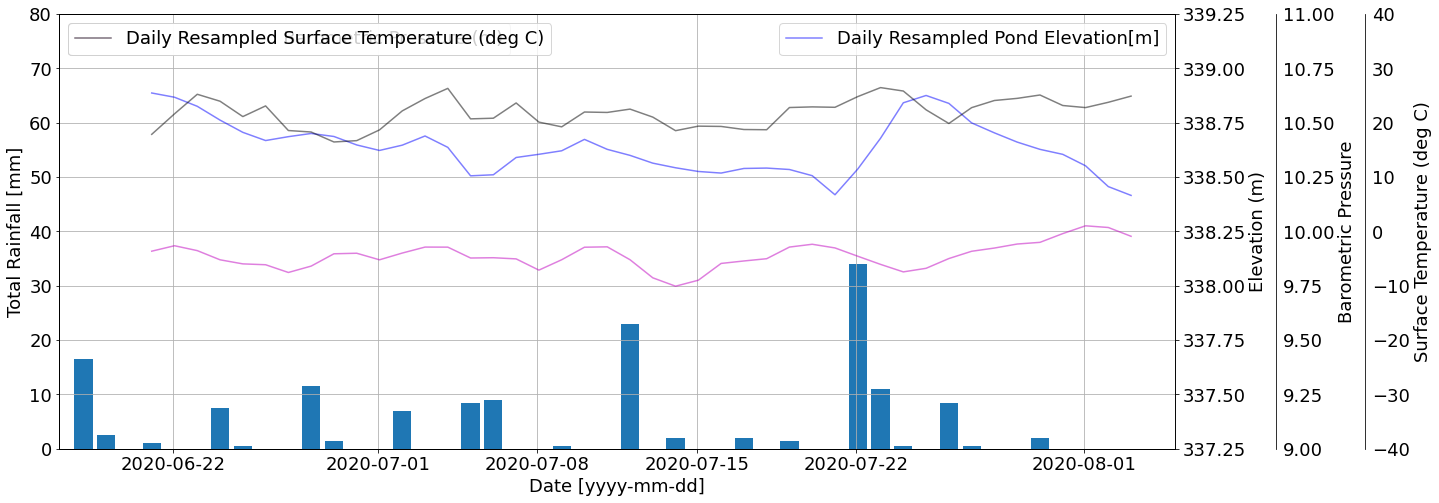

In [19]:
#plot environmental site data

plt.rcParams["figure.figsize"]=(20,8)
fig,(ax1)=plt.subplots(nrows=1, ncols=1,sharex=True)

# #pandas rainfall data
ax1.bar(datevec,rf_data, label="Rainfall [mm]")
ax1.set_ylim(0,80)
ax1.set_ylabel("Total Rainfall [mm]",fontsize=18)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=18)
ax1.grid()
ax1.set_xlim('2020-06-17','2020-08-05')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.legend(fontsize=18,loc=4)

# # Barometric pressure
ax2=ax1.twinx()
ax2.plot(datevectr,pp_daily['Barometric Pressure[mH20]'],'-m',alpha=0.5,label="Daily Resampled Barometric Pressure (m)")
ax2.spines['right'].set_position(("axes", 1.09))
ax2.set_ylim(9,11)
ax2.tick_params(axis='y',labelsize=18)
ax2.yaxis.set_ticks_position('none')
ax2.set_ylabel("Barometric Pressure",fontsize=18)
ax2.legend(fontsize=18,loc=2)

ax3=ax1.twinx()
ax3.set_ylabel("Elevation (m)",fontsize=18)
ax3.set_ylim(337.25,339.25)
ax3.plot(datevectr,pp_daily['Primary Pond Level[m]'],'-b',alpha=0.5,label='Daily Resampled Pond Elevation[m]')
ax3.legend(fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xlim('2020-06-17','2020-08-05')
ax3.tick_params(axis='x', labelsize=18) 
#plt.title("Environmental Site Data",fontsize=24)

# # Temperature Data
ax4=ax1.twinx()
ax4.plot(datevectr,pp_daily['PanelTemp[degC]'],'-k',alpha=0.5,label="Daily Resampled Surface Temperature (deg C)")
ax4.spines['right'].set_position(("axes", 1.17))
ax4.set_ylim(-40,40)
ax4.tick_params(axis='y',labelsize=18)
ax4.yaxis.set_ticks_position('none')
ax4.set_ylabel("Surface Temperature (deg C)",fontsize=18)
ax4.legend(fontsize=18,loc=2)

plt.show()

In [20]:
pp_daily.head()

,Barometric Pressure[mH20],PanelTemp[degC],BP_mbar,Primary Pond Level[m],SmartPT_Temp[N/A]
Time,,,,,
2020-06-21 01:30:00,9.908822,17.849097,971.738901,338.886319,11.134028
2020-06-22 01:30:00,9.933891,21.616376,974.197370,338.866829,11.150871
2020-06-23 01:30:00,9.911420,25.218125,971.993729,338.825139,11.459028
2020-06-24 01:30:00,9.869176,23.939722,967.850918,338.761632,11.985069
2020-06-25 01:30:00,9.850443,21.114861,966.013811,338.705382,12.760764


In [21]:
# load pickle files containing dvv information
dvvavg_caus_pkldata=glob.glob("dvv-avg-causal*.pickle")
dvvavg_acaus_pkldata=glob.glob("dvv-avg-acausal*.pickle")

for ifile in range(nsta):
    #causal data -> coda window from 0.5 to 3.5 sec
    with open(dvvavg_caus_pkldata[ifile],'rb') as f:
        dv_avg_causal=pickle.load(f)
    #acausal data -> coda window from -3.5 to -0.5 sec
    with open(dvvavg_acaus_pkldata[ifile],'rb') as f:
        dv_avg_acausal=pickle.load(f)
    dv_avg=ma.masked_equal(np.nanmean((dv_avg_causal,dv_avg_acausal),axis=0),0)
    ista+=1

<ipython-input-21-b0b45ae3bd95>:12: RuntimeWarning: Mean of empty slice
  dv_avg=ma.masked_equal(np.nanmean((dv_avg_causal,dv_avg_acausal),axis=0),0)


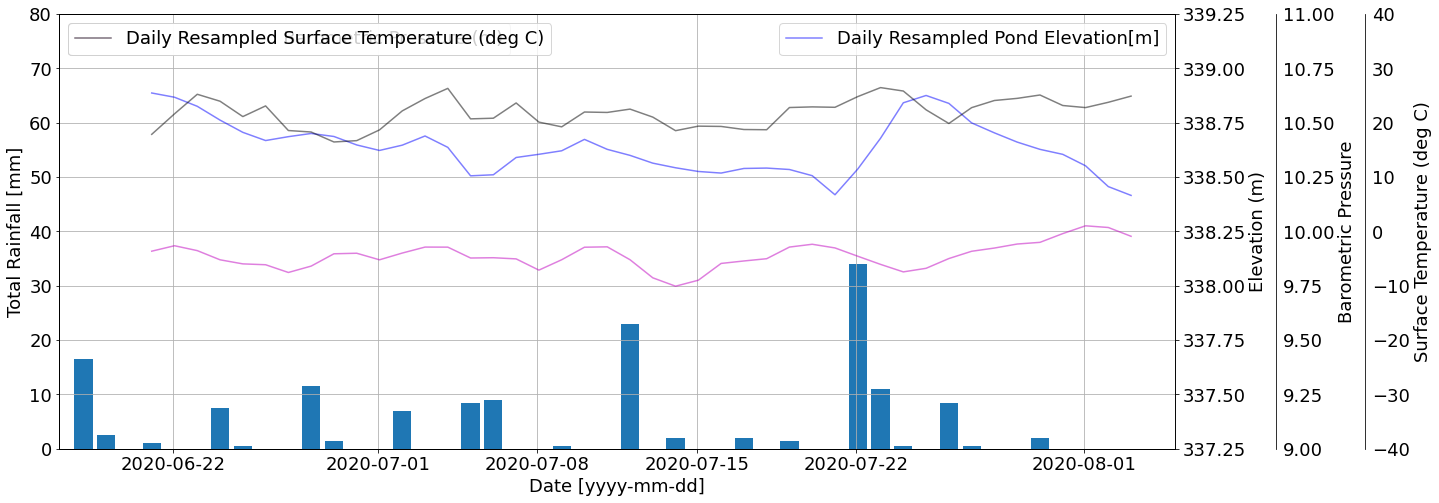

In [27]:
#plot environmental site data

plt.rcParams["figure.figsize"]=(20,8)
fig,(ax1)=plt.subplots(nrows=1, ncols=1,sharex=True)

# #pandas rainfall data
ax1.bar(datevec,rf_data, label="Rainfall [mm]")
ax1.set_ylim(0,80)
ax1.set_ylabel("Total Rainfall [mm]",fontsize=18)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=18)
ax1.grid()
ax1.set_xlim('2020-06-17','2020-08-05')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.legend(fontsize=18,loc=4)

# # Barometric pressure
ax2=ax1.twinx()
ax2.plot(datevectr,pp_daily['Barometric Pressure[mH20]'],'-m',alpha=0.5,label="Daily Resampled Barometric Pressure (m)")
ax2.spines['right'].set_position(("axes", 1.09))
ax2.set_ylim(9,11)
ax2.tick_params(axis='y',labelsize=18)
ax2.yaxis.set_ticks_position('none')
ax2.set_ylabel("Barometric Pressure",fontsize=18)
ax2.legend(fontsize=18,loc=2)

ax3=ax1.twinx()
ax3.set_ylabel("Elevation (m)",fontsize=18)
ax3.set_ylim(337.25,339.25)
ax3.plot(datevectr,pp_daily['Primary Pond Level[m]'],'-b',alpha=0.5,label='Daily Resampled Pond Elevation[m]')
ax3.legend(fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xlim('2020-06-17','2020-08-05')
ax3.tick_params(axis='x', labelsize=18) 
#plt.title("Environmental Site Data",fontsize=24)

# # Temperature Data
ax4=ax1.twinx()
ax4.plot(datevectr,pp_daily['PanelTemp[degC]'],'-k',alpha=0.5,label="Daily Resampled Surface Temperature (deg C)")
ax4.spines['right'].set_position(("axes", 1.17))
ax4.set_ylim(-40,40)
ax4.tick_params(axis='y',labelsize=18)
ax4.yaxis.set_ticks_position('none')
ax4.set_ylabel("Surface Temperature (deg C)",fontsize=18)
ax4.legend(fontsize=18,loc=2)

plt.show()

<ipython-input-28-0ccb53bdbc08>:6: RuntimeWarning: All-NaN axis encountered
  dv_avgmin[i]=np.nanmin(dv_avg[:,i]) # minimum dvv array
<ipython-input-28-0ccb53bdbc08>:7: RuntimeWarning: All-NaN axis encountered
  dv_avgmax[i]=np.nanmax(dv_avg[:,i]) # maximum dvv array
<ipython-input-28-0ccb53bdbc08>:18: RuntimeWarning: Mean of empty slice
  dv_avg_tot=np.nanmean(dv_avg[:],axis=0)


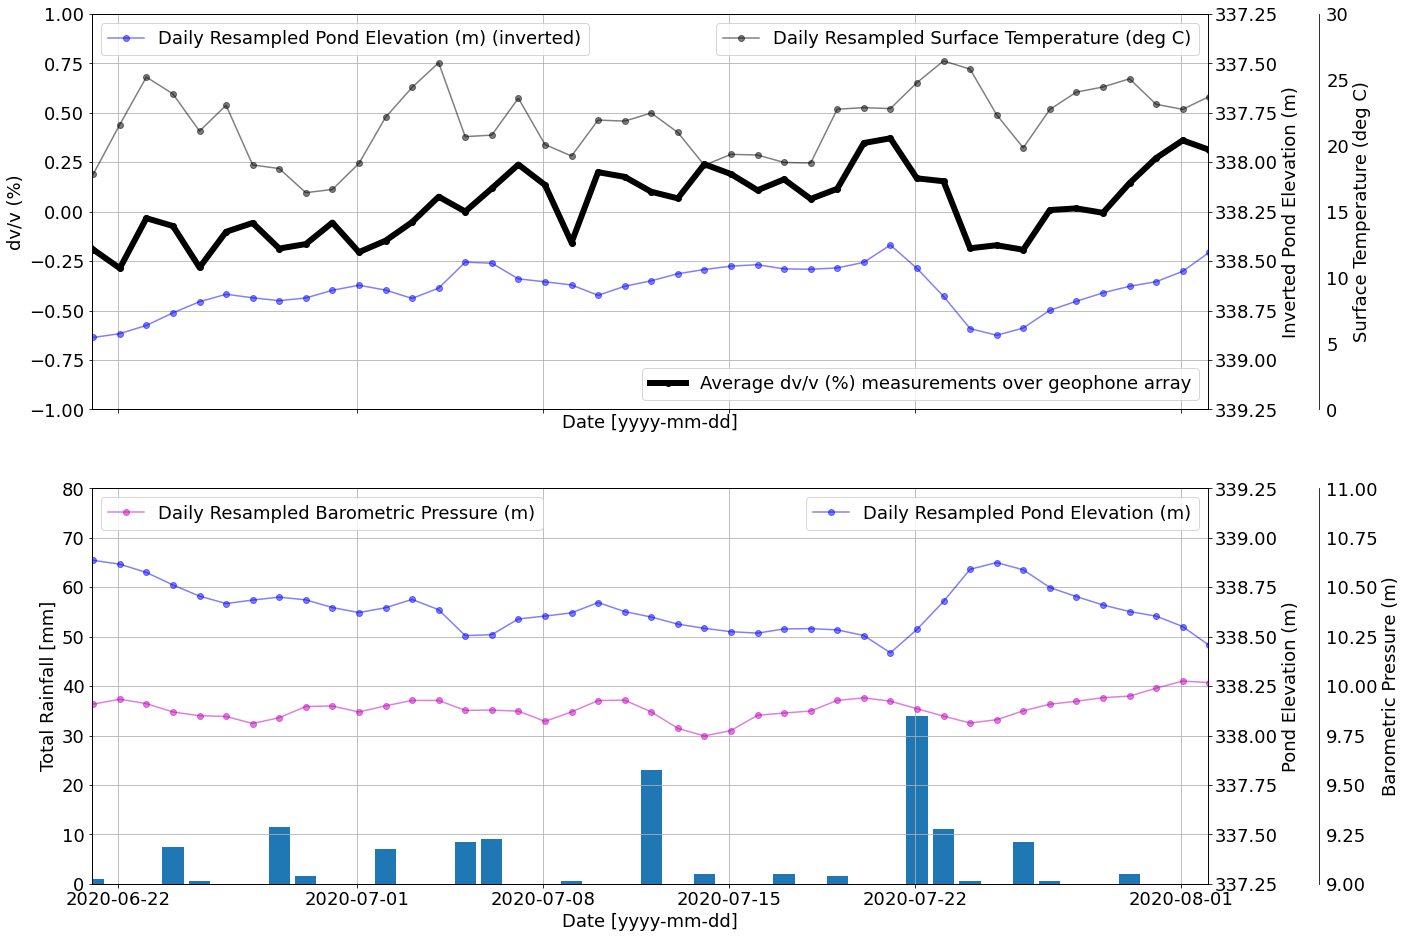

In [28]:
# define arrays for minimum dvv and max dvv, for plotting purposes
dv_avgmin=np.zeros(len(datevec))
dv_avgmax=np.zeros(len(datevec))

for i in range(len(datevec)):
    dv_avgmin[i]=np.nanmin(dv_avg[:,i]) # minimum dvv array
    dv_avgmax[i]=np.nanmax(dv_avg[:,i]) # maximum dvv array


#plot figure including all data (environment & dvv)

plt.rcParams["figure.figsize"]=(20,16)
fig,(ax1,ax3)=plt.subplots(nrows=2, ncols=1,sharex=True)
fsize = 18                      # font size for all labels in plott

#for i in range(nsta):
#    ax1.plot(datevec,dv_avg[i,:],'-k',alpha=0.3)
dv_avg_tot=np.nanmean(dv_avg[:],axis=0)
ax1.plot(datevec,dv_avg_tot,'-ok',linewidth=6,label='Average dv/v (%) measurements over geophone array')
#ax1.plot(datevec,dv_avg_tot,'-k',linewidth=1, alpha=0.5,label='dv/v (%) measurements per source averaged over all receivers')
#ax1.fill_between(datevec, dv_avgmin, dv_avgmax,color='k',alpha=0.1)

#ax1.plot(pp_station["Time"],dVsVs,'-r',linewidth=6,label='Modelled dVs/Vs changes at a depth of 10 m')
#ax1.plot(vs_array[:,0],vs_array[:,-1],'-r',linewidth=6,label='Modelled dVs/Vs changes at a depth of 10 m')

ax1.set_ylim(-1,1)
ax1.set_ylabel("dv/v (%)",fontsize=fsize)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=fsize)
ax1.set_xlim('2020-06-20','2020-08-05')
ax1.legend(fontsize=fsize,loc=4)
ax1.tick_params(axis='x',labelsize=18)

ax1.grid()

ax2=ax1.twinx()
ax2.set_ylabel("Inverted Pond Elevation (m)",fontsize=fsize)
ax2.set_ylim(337.25,339.25)
ax2.plot(datevectr,pp_daily['Primary Pond Level[m]'],'-ob',alpha=0.5,label='Daily Resampled Pond Elevation (m) (inverted)')
ax2.legend(fontsize=fsize,loc=2)
ax1.tick_params(axis='y', labelsize=fsize) 
ax2.tick_params(axis='y', labelsize=fsize) 
ax2.set_xlim('2020-06-21','2020-08-05')
ax2.invert_yaxis()

# #pandas rainfall data
ax3.bar(datevec,rf_data, label="Rainfall [mm]")
ax3.set_ylim(0,80)
ax3.set_ylabel("Total Rainfall [mm]",fontsize=fsize)
ax3.set_xlabel("Date [yyyy-mm-dd]",fontsize=fsize)
ax3.grid()
ax3.set_xlim('2020-06-21','2020-08-05')
ax3.tick_params(axis='y', labelsize=fsize)
ax3.tick_params(axis='x',labelsize=fsize)


# # Barometric pressure
ax6=ax3.twinx()
ax6.plot(datevectr,pp_daily['Barometric Pressure[mH20]'],'-om',alpha=0.5,label="Daily Resampled Barometric Pressure (m)")
ax6.spines['right'].set_position(("axes", 1.1))
ax6.set_ylim(9,11)
ax6.tick_params(axis='y',labelsize=fsize)
ax6.yaxis.set_ticks_position('none')
ax6.set_ylabel("Barometric Pressure (m)",fontsize=fsize)
ax6.legend(fontsize=fsize,loc=2)
ax6.tick_params(axis='x',labelsize=18)


ax4=ax3.twinx()
ax4.set_ylabel("Pond Elevation (m)",fontsize=fsize)
ax4.set_ylim(337.25,339.25)
ax4.plot(datevectr,pp_daily['Primary Pond Level[m]'],'-ob',alpha=0.5,label='Daily Resampled Pond Elevation (m)')
ax4.legend(fontsize=fsize)
ax4.tick_params(axis='y', labelsize=fsize)
ax4.set_xlim('2020-06-21','2020-08-02')
ax4.tick_params(axis='x', labelsize=fsize) 

# # Temperature Data
ax7=ax1.twinx()
ax7.plot(datevectr,pp_daily['PanelTemp[degC]'],'-ok',alpha=0.5,label="Daily Resampled Surface Temperature (deg C)")
ax7.spines['right'].set_position(("axes", 1.1))
ax7.set_ylim(0,30)
ax7.tick_params(axis='y',labelsize=18)
ax7.yaxis.set_ticks_position('none')
ax7.set_ylabel("Surface Temperature (deg C)",fontsize=fsize)
ax7.legend(fontsize=18,loc=2)



plt.legend(fontsize=fsize)
plt.show()

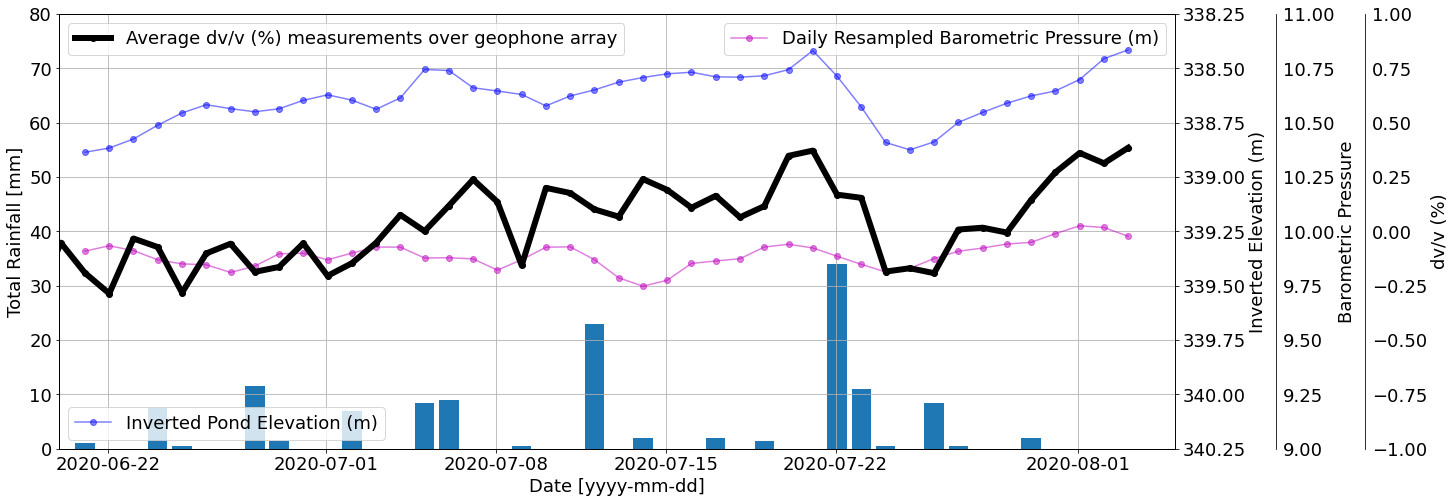

In [29]:
#plot environmental site data

plt.rcParams["figure.figsize"]=(20,8)
fig,(ax1)=plt.subplots(nrows=1, ncols=1,sharex=True)

# #pandas rainfall data
ax1.bar(datevec,rf_data, label="Rainfall [mm]")
ax1.set_ylim(0,80)
ax1.set_ylabel("Total Rainfall [mm]",fontsize=18)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=18)
ax1.grid()
ax1.set_xlim('2020-06-17','2020-08-05')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.legend(fontsize=18,loc=4)

# # Barometric pressure
ax2=ax1.twinx()
ax2.plot(datevectr,pp_daily['Barometric Pressure[mH20]'],'-om',alpha=0.5,label="Daily Resampled Barometric Pressure (m)")
ax2.spines['right'].set_position(("axes", 1.09))
ax2.set_ylim(9,11)
ax2.tick_params(axis='y',labelsize=18)
ax2.yaxis.set_ticks_position('none')
ax2.set_ylabel("Barometric Pressure",fontsize=18)
ax2.legend(fontsize=18,loc=1)

ax3=ax1.twinx()
ax3.set_ylabel("Inverted Elevation (m)",fontsize=18)
ax3.set_ylim(338.25,340.25)
ax3.plot(datevectr,pp_daily['Primary Pond Level[m]'],'-ob',alpha=0.5,label='Inverted Pond Elevation (m)')
ax3.legend(fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xlim('2020-06-17','2020-08-05')
ax3.tick_params(axis='x', labelsize=18) 
#plt.title("Environmental Site Data",fontsize=24)
ax3.invert_yaxis()
ax3.legend(fontsize=18,loc=3)

# dvv data
ax4=ax1.twinx()

ax4.plot(datevec,dv_avg_tot,'-ok',linewidth=6,label='Average dv/v (%) measurements over geophone array')
ax4.set_ylim(-1,1)
ax4.set_ylabel("dv/v (%)",fontsize=fsize)
ax4.set_xlabel("Date [yyyy-mm-dd]",fontsize=fsize)
ax4.set_xlim('2020-06-20','2020-08-05')
ax4.legend(fontsize=fsize,loc=2)
ax4.tick_params(axis='x',labelsize=18)
ax4.tick_params(axis='y',labelsize=18)
ax4.yaxis.set_ticks_position('none')
ax4.spines['right'].set_position(("axes", 1.17))


# ax4.plot(datevectr,pp_daily['PanelTemp[degC]'],'-k',alpha=0.5,label="Daily Resampled Surface Temperature (deg C)")
# ax4.spines['right'].set_position(("axes", 1.17))
# ax4.set_ylim(-40,40)
# ax4.tick_params(axis='y',labelsize=18)
# ax4.yaxis.set_ticks_position('none')
# ax4.set_ylabel("Surface Temperature (deg C)",fontsize=18)
# ax4.legend(fontsize=18,loc=2)

plt.show()

In [40]:
pp_station.index

DatetimeIndex(['2020-06-01 00:00:00', '2020-06-01 00:05:00',
               '2020-06-01 00:10:00', '2020-06-01 00:15:00',
               '2020-06-01 00:20:00', '2020-06-01 00:25:00',
               '2020-06-01 00:30:00', '2020-06-01 00:35:00',
               '2020-06-01 00:40:00', '2020-06-01 00:45:00',
               ...
               '2020-08-31 23:10:00', '2020-08-31 23:15:00',
               '2020-08-31 23:20:00', '2020-08-31 23:25:00',
               '2020-08-31 23:30:00', '2020-08-31 23:35:00',
               '2020-08-31 23:40:00', '2020-08-31 23:45:00',
               '2020-08-31 23:50:00', '2020-08-31 23:55:00'],
              dtype='datetime64[ns]', name='Time', length=26478, freq=None)

In [46]:
rel_pond=pp_station['Primary Pond Level[m]']-pp_station['Primary Pond Level[m]'][0]

In [47]:
rel_pond

Time
2020-06-01 00:00:00    0.00
2020-06-01 00:05:00    0.00
2020-06-01 00:10:00   -0.01
2020-06-01 00:15:00    0.00
2020-06-01 00:20:00    0.00
                       ... 
2020-08-31 23:35:00   -0.09
2020-08-31 23:40:00   -0.09
2020-08-31 23:45:00   -0.09
2020-08-31 23:50:00   -0.09
2020-08-31 23:55:00   -0.09
Name: Primary Pond Level[m], Length: 26478, dtype: float64

<ipython-input-52-7a802aefc251>:6: RuntimeWarning: All-NaN axis encountered
  dv_avgmin[i]=np.nanmin(dv_avg[:,i]) # minimum dvv array
<ipython-input-52-7a802aefc251>:7: RuntimeWarning: All-NaN axis encountered
  dv_avgmax[i]=np.nanmax(dv_avg[:,i]) # maximum dvv array
<ipython-input-52-7a802aefc251>:18: RuntimeWarning: Mean of empty slice
  dv_avg_tot=np.nanmean(dv_avg[:],axis=0)


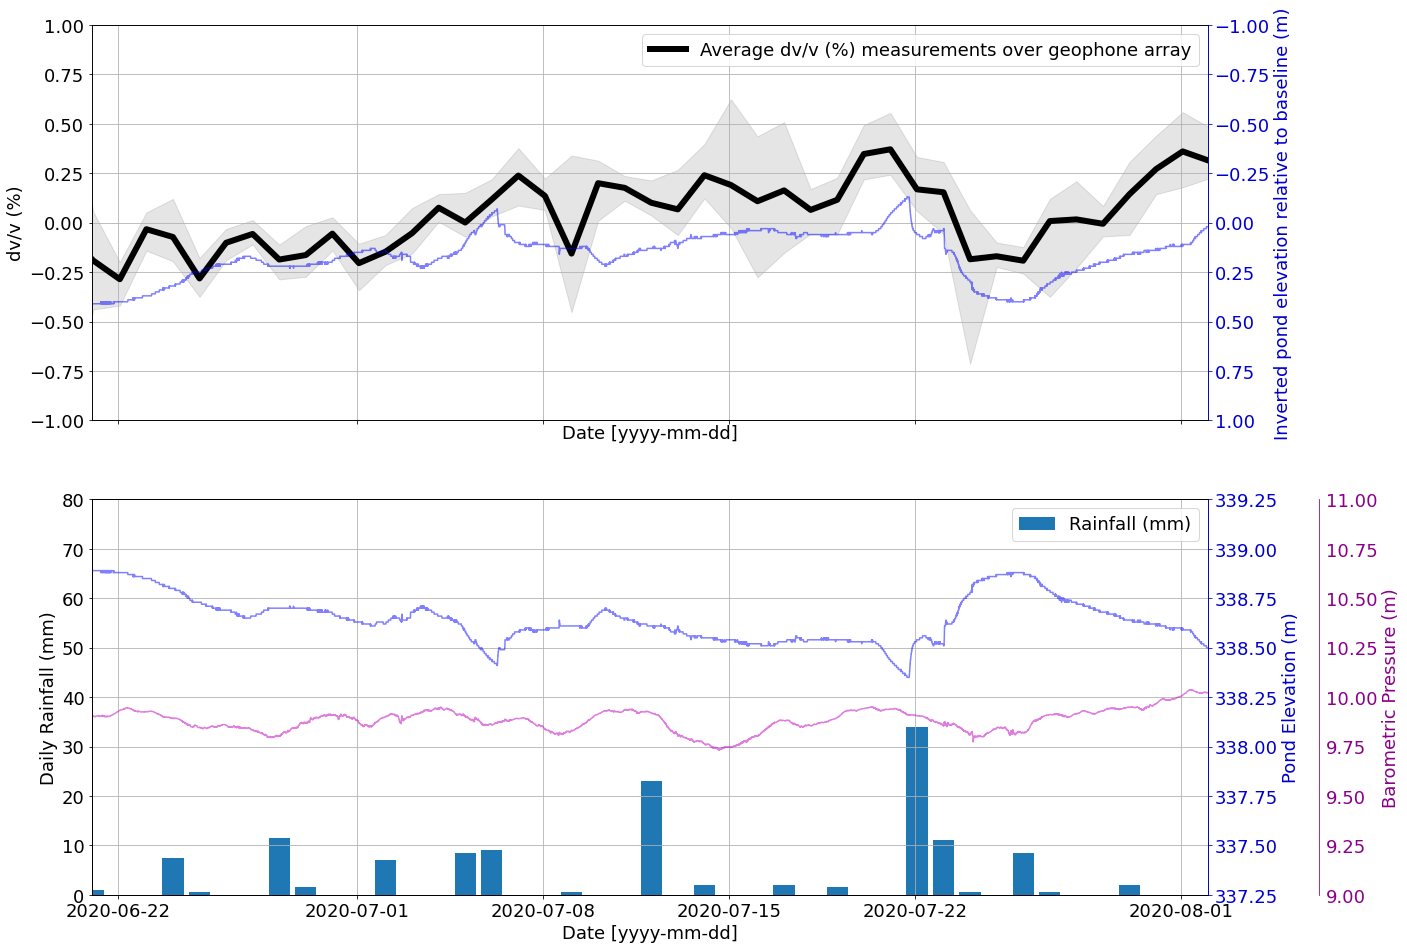

In [52]:
# define arrays for minimum dvv and max dvv, for plotting purposes
dv_avgmin=np.zeros(len(datevec))
dv_avgmax=np.zeros(len(datevec))

for i in range(len(datevec)):
    dv_avgmin[i]=np.nanmin(dv_avg[:,i]) # minimum dvv array
    dv_avgmax[i]=np.nanmax(dv_avg[:,i]) # maximum dvv array


#plot figure including all data (environment & dvv)

plt.rcParams["figure.figsize"]=(20,16)
fig,(ax1,ax3)=plt.subplots(nrows=2, ncols=1,sharex=True)
fsize = 18                      # font size for all labels in plott

# for i in range(nsta):
#     ax1.plot(datevec,dv_avg[i,:],'-k',alpha=0.3)
dv_avg_tot=np.nanmean(dv_avg[:],axis=0)
ax1.plot(datevec,dv_avg_tot,'-k',linewidth=6,label='Average dv/v (%) measurements over geophone array')
#ax1.plot(datevec,dv_avg_tot,'-k',linewidth=1, alpha=0.5,label='dv/v (%) measurements per source averaged over all receivers')
ax1.fill_between(datevec, dv_avgmin, dv_avgmax,color='k',alpha=0.1)
#ax1.plot(pp_station["Time"],dVsVs,'-r',linewidth=6,label='Modelled dVs/Vs changes at a depth of 10 m')
#ax1.plot(vs_array[:,0],vs_array[:,-1],'-r',linewidth=6,label='Modelled dVs/Vs changes at a depth of 10 m')

ax1.set_ylim(-1,1)
ax1.set_ylabel("dv/v (%)",fontsize=fsize)
ax1.set_xlabel("Date [yyyy-mm-dd]",fontsize=fsize)
ax1.set_xlim('2020-06-20','2020-08-05')
ax1.legend(fontsize=fsize,loc=1)
ax1.tick_params(axis='x',labelsize=18)

ax1.grid()

ax2=ax1.twinx()
ax2.set_ylabel("Inverted pond elevation relative to baseline (m)",fontsize=fsize)
#ax2.set_ylim(337.25,339.25)
ax2.set_ylim(-1,1)

#ax2.plot(pp_station.index,pp_station['Primary Pond Level[m]'],'-b',alpha=0.5,label='Inverted Pond Elevation (m)')
ax2.plot(pp_station.index,rel_pond,'-b',alpha=0.5,label='Inverted Pond Elevation (m)')

#ax2.legend(fontsize=fsize)
ax1.tick_params(axis='y', labelsize=fsize) 
ax2.tick_params(axis='y', labelsize=fsize,colors='mediumblue') 
ax2.set_xlim('2020-06-21','2020-08-05')
ax2.spines['right'].set_color('mediumblue')
ax2.yaxis.label.set_color('mediumblue')

ax2.invert_yaxis()

# #pandas rainfall data
ax3.bar(datevec,rf_data, label="Rainfall (mm)")
ax3.set_ylim(0,80)
ax3.set_ylabel("Daily Rainfall (mm)",fontsize=fsize)
ax3.set_xlabel("Date [yyyy-mm-dd]",fontsize=fsize)
ax3.grid()
ax3.set_xlim('2020-06-21','2020-08-05')
ax3.tick_params(axis='y', labelsize=fsize)
ax3.tick_params(axis='x',labelsize=fsize)
ax3.legend(fontsize=fsize)
# # Barometric pressure
ax6=ax3.twinx()
ax6.plot(pp_station.index,pp_station['Barometric Pressure[mH20]'],'-m',alpha=0.5,label="Barometric Pressure (m)")
ax6.spines['right'].set_position(("axes", 1.1))
ax6.spines['right'].set_color('darkmagenta')
ax6.tick_params(axis='y',labelsize=fsize,colors='darkmagenta')
ax6.yaxis.label.set_color('darkmagenta')

ax6.set_ylim(9,11)
ax6.yaxis.set_ticks_position('none')
ax6.set_ylabel("Barometric Pressure (m)",fontsize=fsize)
#ax6.legend(fontsize=fsize,loc=2)
ax6.tick_params(axis='x',labelsize=18)


ax4=ax3.twinx()
ax4.set_ylabel("Pond Elevation (m)",fontsize=fsize)
ax4.set_ylim(337.25,339.25)
ax4.plot(pp_station.index,pp_station['Primary Pond Level[m]'],'-b',alpha=0.5,label='Pond Elevation (m)')
#ax4.legend(fontsize=fsize)
ax4.tick_params(axis='y', labelsize=fsize,colors='mediumblue')
ax4.set_xlim('2020-06-21','2020-08-02')
ax4.tick_params(axis='x', labelsize=fsize) 
ax4.spines['right'].set_color('mediumblue')
ax4.yaxis.label.set_color('mediumblue')

#plt.legend(fontsize=fsize)
plt.show()